Objective: Improve customer experinece by analyzing the sales data and increase sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Sales_analysis.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#Drop the null columns

df.drop(["Status" , "unnamed1"], axis=1, inplace= True)

In [7]:
#finding null values

In [8]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#drop null values
df.dropna(inplace=True)

In [11]:
df.tail(50)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
11201,1000877,Sanjova,P00023142,F,26-35,28,1,Madhya Pradesh,Central,Media,Veterinary,2,738.0
11202,1000575,Katherine,P00110842,F,26-35,27,0,Delhi,Central,Healthcare,Veterinary,1,736.0
11203,1000045,Byrd,P00205942,M,46-50,49,1,Maharashtra,Western,IT Sector,Veterinary,3,732.0
11204,1002796,Thompson,P00110942,F,26-35,29,0,Delhi,Central,Chemical,Veterinary,1,720.0
11205,1002764,Murray,P00219942,F,26-35,27,0,Himachal Pradesh,Northern,Agriculture,Pet Care,2,719.0
11206,1005282,Hood,P00189842,M,18-25,25,0,Madhya Pradesh,Central,Construction,Veterinary,4,700.0
11207,1001782,Cunningham,P00331042,F,46-50,47,1,Uttar Pradesh,Central,Automobile,Pet Care,3,697.0
11208,1002121,Prescott,P00344042,F,55+,64,0,Uttarakhand,Central,Healthcare,Pet Care,1,688.0
11209,1005256,Grant,P00253142,F,26-35,33,1,Haryana,Northern,Govt,Pet Care,4,686.0
11210,1002766,Cyma,P00265742,F,46-50,50,0,Uttar Pradesh,Central,Healthcare,Pet Care,2,686.0


In [12]:
#changing data type
df['Amount']= df['Amount'].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [14]:
df.rename(columns={'Cust_name': 'Customer_Name'}, inplace=True)


In [15]:
df.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.dtypes

User_ID              int64
Customer_Name       object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [17]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


1.This concise summary provides key insights into demographic trends, purchasing behavior, and financial transactions within the dataset. 
2.People of on average 35 years ages,placing the majority between 27 and 43 years are mostly the customers.
3.In terms of purchasing behavior, the average number of orders per customer is approximately 2, with a minimum of 1 order and a maximum of 4.
4.The 'Amount' column reveals the financial dimension of the dataset, indicating that the average transaction amount is 9453.61.

In [18]:
#Gender
gender_counts=df['Gender'].value_counts()
gender_counts

Gender
F    7832
M    3407
Name: count, dtype: int64

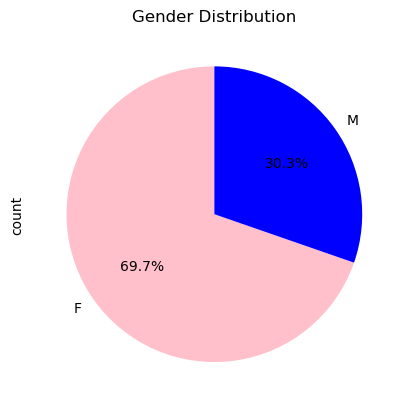

In [19]:
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'blue'])
plt.title('Gender Distribution')
plt.show()

So according to this graph, most of the customers are female.

In [20]:
#groupby Gender with total purchasing amount
purchase = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)
purchase

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

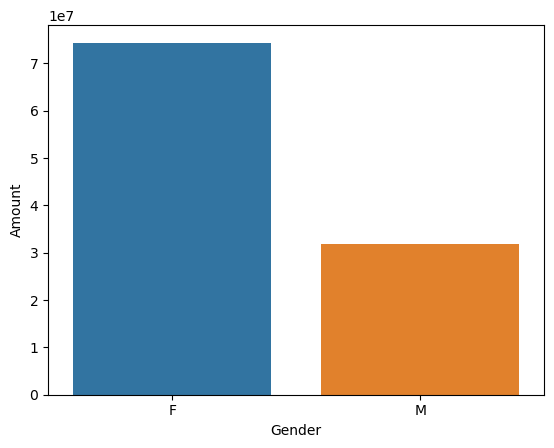

In [21]:
sns.barplot(x='Gender', y = 'Amount', data=purchase)

purchasing power of females are more than males.

In [22]:
#Binning the age group
bins= np.linspace(min(df["Age"]),max(df["Age"]),4)
group_name= ["Young","Middle_aged", "Old"]
df["Age_binned"]=pd.cut(df["Age"],bins,labels=group_name,include_lowest = True)

In [23]:
age_group_counts = df["Age_binned"].value_counts()
age_group_counts

Age_binned
Young          7406
Middle_aged    3526
Old             307
Name: count, dtype: int64

In [24]:
for bin_label, count in zip(age_group_counts.index, age_group_counts):
    bin_range = df[df["Age_binned"] == bin_label]["Age"].agg(['min', 'max'])
    print(f"{bin_label}: {count} counts, Age range: {bin_range}")

Young: 7406 counts, Age range: min    12
max    38
Name: Age, dtype: int64
Middle_aged: 3526 counts, Age range: min    39
max    65
Name: Age, dtype: int64
Old: 307 counts, Age range: min    66
max    92
Name: Age, dtype: int64


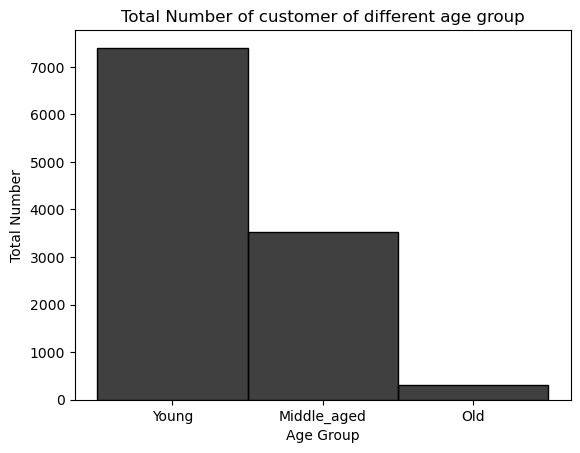

In [25]:
sns.histplot(df["Age_binned"], bins=20, kde=False, color='black', edgecolor='black')

plt.xlabel('Age Group')
plt.ylabel('Total Number')
plt.title('Total Number of customer of different age group')
plt.show()


about 7406 customers are young whose age range is between 12-38. 
Around 3526 customers are middle ages whose age range are between  39-65.
there are few old customers too between the age range 66-92.


In [26]:
#Binned age group by total amount
Age_per_amo = df.groupby([df["Age_binned"]],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending= False)
Age_per_amo 

,Age_binned,Amount
0,Young,69206761
1,Middle_aged,34074033
2,Old,2968335


In [27]:
#Identify Repeat Customer
repeat_customers = df['Customer_Name'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].index.tolist()
repeat_customers

['Vishakha',
 'Shreyshi',
 'Sudevi',
 'Akshat',
 'Alejandro',
 'Aastha',
 'Stuti',
 'Hazel',
 'Halladay',
 'Gonzalez',
 'Neola',
 'Vasudev',
 'Bixby',
 'Phonely',
 'Parth',
 'Gopal',
 'Akash',
 'Sanjay',
 'Barton',
 'Hitesh',
 'Siddharth',
 'Christina',
 'Jackson',
 'Adhvaita',
 'Rutuja',
 'Barnes',
 'Indulekha',
 'Fritzler',
 'Cathy',
 'Gjertsen',
 'Sandra',
 'Debra',
 'Sukant',
 'Crebagga',
 'Laalji',
 'Rohan',
 'Champaklata',
 'Sanjova',
 'Becky',
 'Lalita',
 'Gunjan',
 'Kamberova',
 'Amol',
 'Patricia',
 'Jaydeep',
 'Kartikay',
 'Oshin',
 'Kennedy',
 'Swati',
 'Sonal',
 'Bharat',
 'Ginny',
 'Jamie',
 'Charlotte',
 'Noel',
 'Uudhav',
 'Shivam',
 'Sharda',
 'Cacioppo',
 'Dortch',
 'Rittenbach',
 'Brumley',
 'Dilbeck',
 'Jitesh',
 'Bremer',
 'Shrichand',
 'Aniket',
 'Mrunal',
 'Boyes',
 'Frazer',
 'McGuire',
 'Aishwarya',
 'Shivangi',
 'Parna',
 'Michelle',
 'Eugene',
 'Randy',
 'Troy',
 'Atul',
 'Fein',
 'Rahul',
 'Kiran',
 'Dickinson',
 'Ameesha',
 'Katrina',
 'Nockton',
 'Catlett',

There are many repeat customers. 

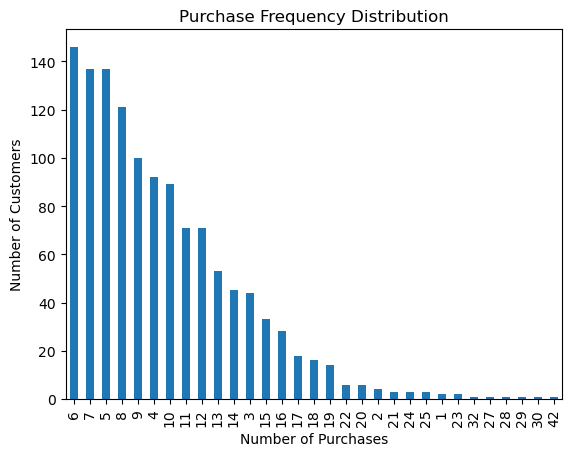

In [28]:
df['Customer_Name'].value_counts().value_counts().plot(kind='bar')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Purchase Frequency Distribution')
plt.show()

this chart shows the distribution of customers based on the number of purchases they have made. its clear from this chart that  maximum customer buy 6 items.On average more than 50% customer buy  6 - 13 items. there are very few people who did one time purchase 

In [29]:
# Calculate Customer Loyalty Metrics
total_customers = df['Customer_Name'].nunique()
repeat_customer_count = len(repeat_customers)
retention_rate = (repeat_customer_count / total_customers) * 100
print(f"Customer Retention Rate: {retention_rate:.2f}%")

Customer Retention Rate: 99.84%


Retention percentage indicates the proportion of customers who made repeat purchases relative to the total number of unique customers in the dataset.
In this case, a retention rate of 99.84% suggests that a very high percentage of customers have made more than one purchase.
A high retention rate is generally considered positive for business performance. It indicates that a significant majority of customers are making repeat purchases, which is essential for sustained revenue.
A high retention rate is associated with a higher customer lifetime value, indicating that customers are likely to contribute more revenue over the long term.

In [30]:
# Segment customers based on their purchasing behavior
df['Customer_Segment'] = pd.cut(df['Orders'], bins=[0, 1, 2, float('inf')], labels=['One-Time', 'Repeat', 'Frequent'])
df['Customer_Segment'].value_counts()

Customer_Segment
Frequent    5538
Repeat      2893
One-Time    2808
Name: count, dtype: int64

The segmentation allows for the development of targeted marketing strategies for each customer segment.
Frequent customers may receive loyalty rewards, repeat customers might get targeted promotions, and efforts can be made to convert one-time customers into repeat customers.

In [31]:
#finding highest selling products
category_sales = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)
top_categories = category_sales.head(5)  
print("Top 5 performing product categories:")
print(top_categories)

Top 5 performing product categories:
Product_Category
Food                     33933883
Clothing & Apparel       16495019
Electronics & Gadgets    15643846
Footwear & Shoes         15575209
Furniture                 5440051
Name: Amount, dtype: int32


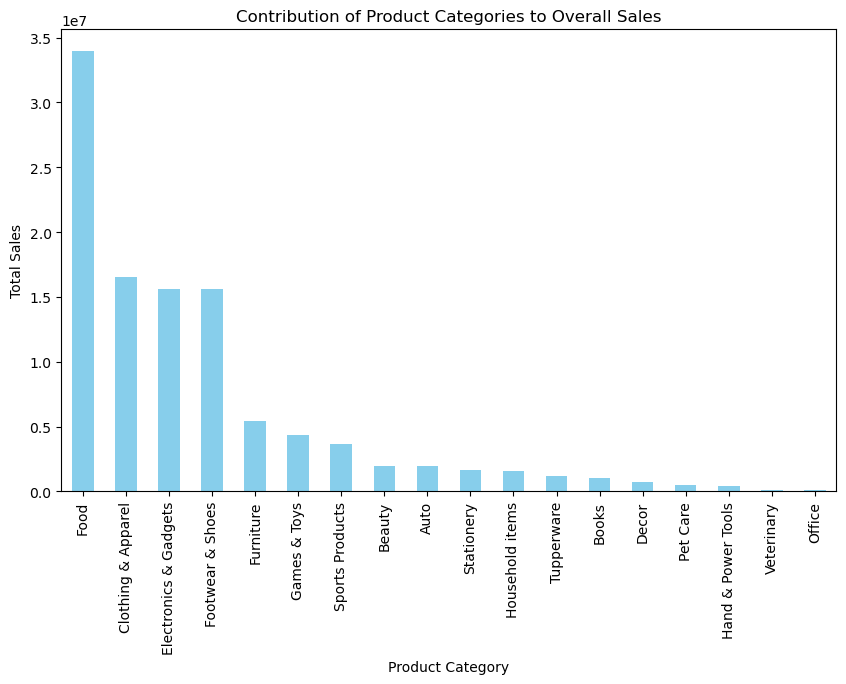

In [32]:
 category_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Contribution of Product Categories to Overall Sales')
plt.show()

according to the graph, here the highest selling product is Food and the second highest selling is clothing and apparel.


In [33]:
specific_category = 'Food'

# Filter the DataFrame based on the specific product category
filtered_df = df[df['Product_Category'] == specific_category]

# Print the Product IDs for the specific category
product_ids = filtered_df['Product_ID'].unique()
print(f"Product IDs for '{specific_category}' category: {', '.join(product_ids)}")

Product IDs for 'Food' category: P00053842, P00113942, P00190942, P00028542, P00312842, P00051442, P00087042, P00301542, P00027542, P00026042, P00218142, P00165942, P00197042, P00154642, P00114942, P00144242, P00334242, P00351042, P00234542, P00086442, P00093242, P00340942, P00036842, P00182142, P00085942, P00179442, P00255842, P00050542, P00119142, P00129542, P00255942, P00184942, P00120042, P00111942, P00344242, P00241642, P00101342, P00043342, P00148642, P00334642, P00331942, P00102342, P00114842, P00042242, P00368642, P00080342, P00116642, P00181542, P00118342, P00113842, P00020242, P00112542, P00155242, P00084842, P00278642, P00244142, P00043542, P00169442, P00162942, P00319342, P00279542, P00058142, P00350342, P00307342, P00338542, P00113142, P00084442, P00145742, P00039442, P00183242, P00330242, P00370242, P00219942, P00151742, P00212942, P00280242, P00180342, P00114142, P00179842, P00058442, P00265742, P00117742, P00228142, P00331842, P00354642, P00237542, P00328042, P00145942,

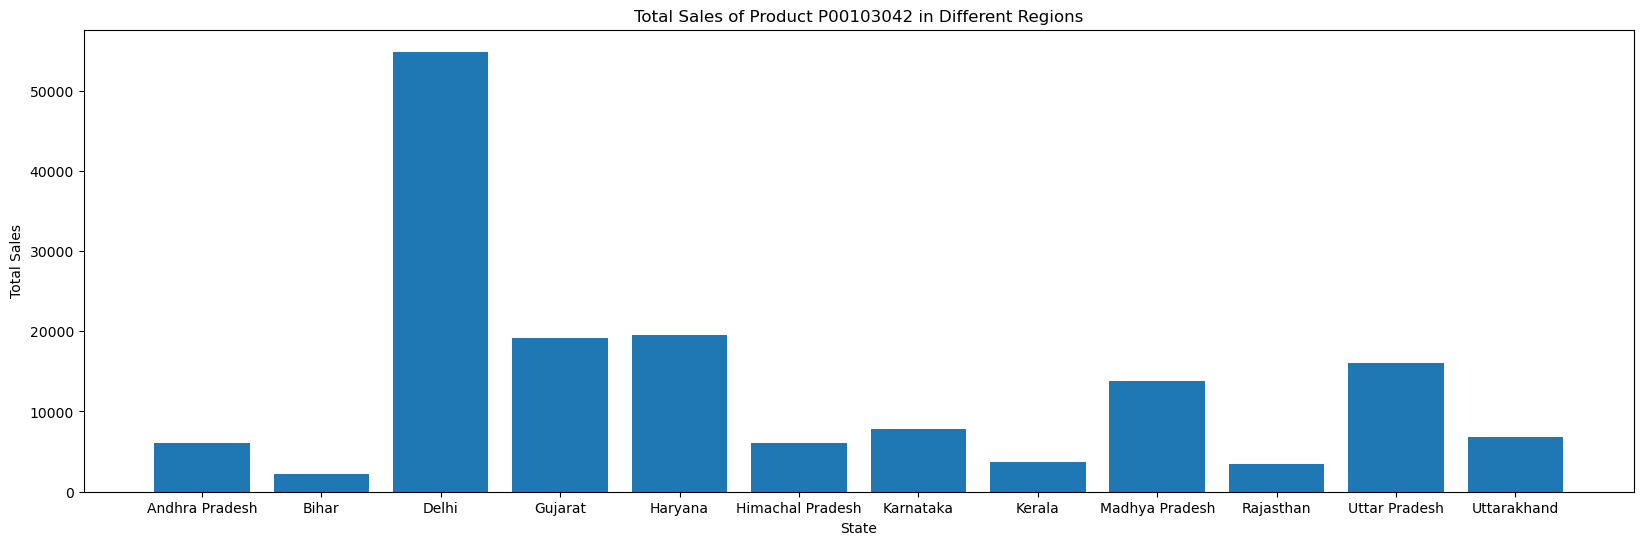

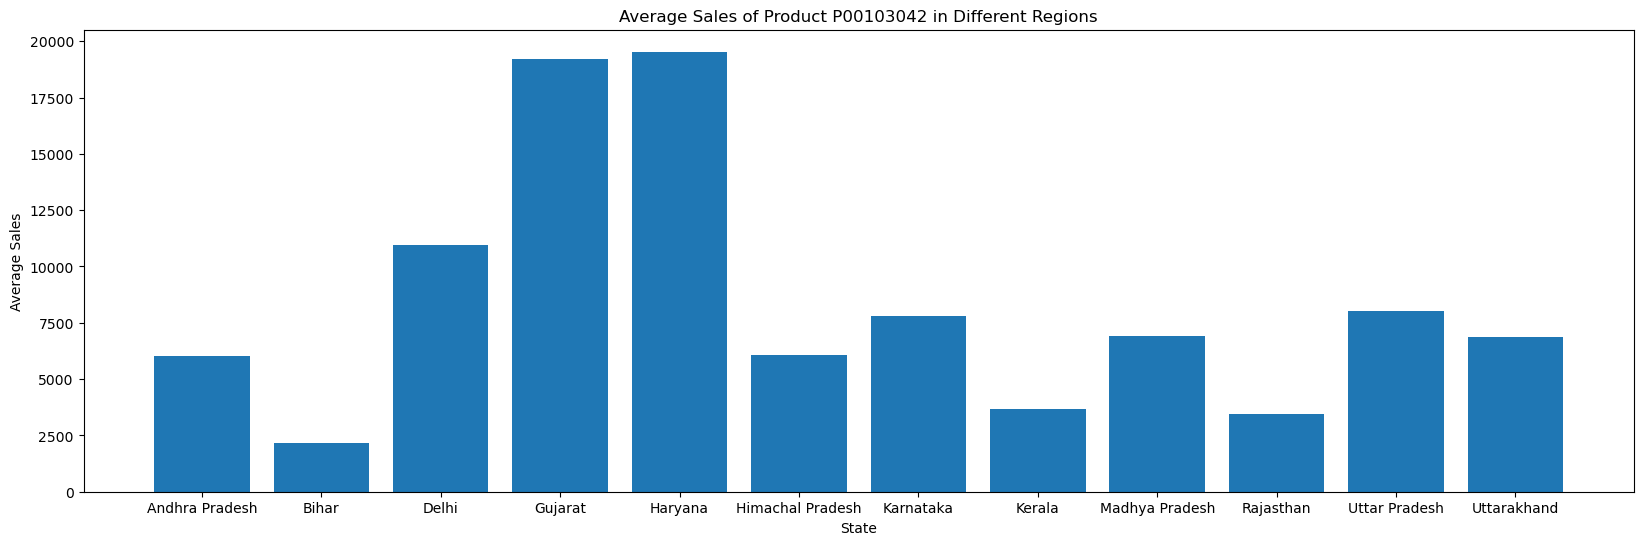

In [34]:
specific_product_id = 'P00103042'
product_data = df[df['Product_ID'] == specific_product_id]

# Step 2: Group by Region and calculate summary statistics
region_summary = product_data.groupby('State')['Amount'].agg(['sum', 'mean', 'count']).reset_index()

# Step 3: Visualize total sales in each region using a bar chart
plt.figure(figsize=(20, 6))
plt.bar(region_summary['State'], region_summary['sum'])
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title(f'Total Sales of Product {specific_product_id} in Different Regions')
plt.show()

# Step 4: Compare average sales in each region using another bar chart
plt.figure(figsize=(20, 6))
plt.bar(region_summary['State'], region_summary['mean'])
plt.xlabel('State')
plt.ylabel('Average Sales')
plt.title(f'Average Sales of Product {specific_product_id} in Different Regions')
plt.show()

On the basis of this both graph , we can say that Delhi has the highest total sale but Hariyana has the highest average sale .

Delhi :Delhi has a large number of transactions, resulting in a substantial total sales figure. This might be due to a large population or high market demand. Despite the high total sales, the average value per transaction in Delhi is lower. This could be because there's a diverse customer base with varying spending capacities, including budget-conscious consumers.

Haryana : Even though Haryana has a smaller total sales figure, the average value per transaction is higher. This indicates that customers in Haryana, on average, are willing to spend more money per purchase.The total sales in Haryana might be lower due to a smaller number of transactions compared to Delhi. However, each transaction is more valuable.

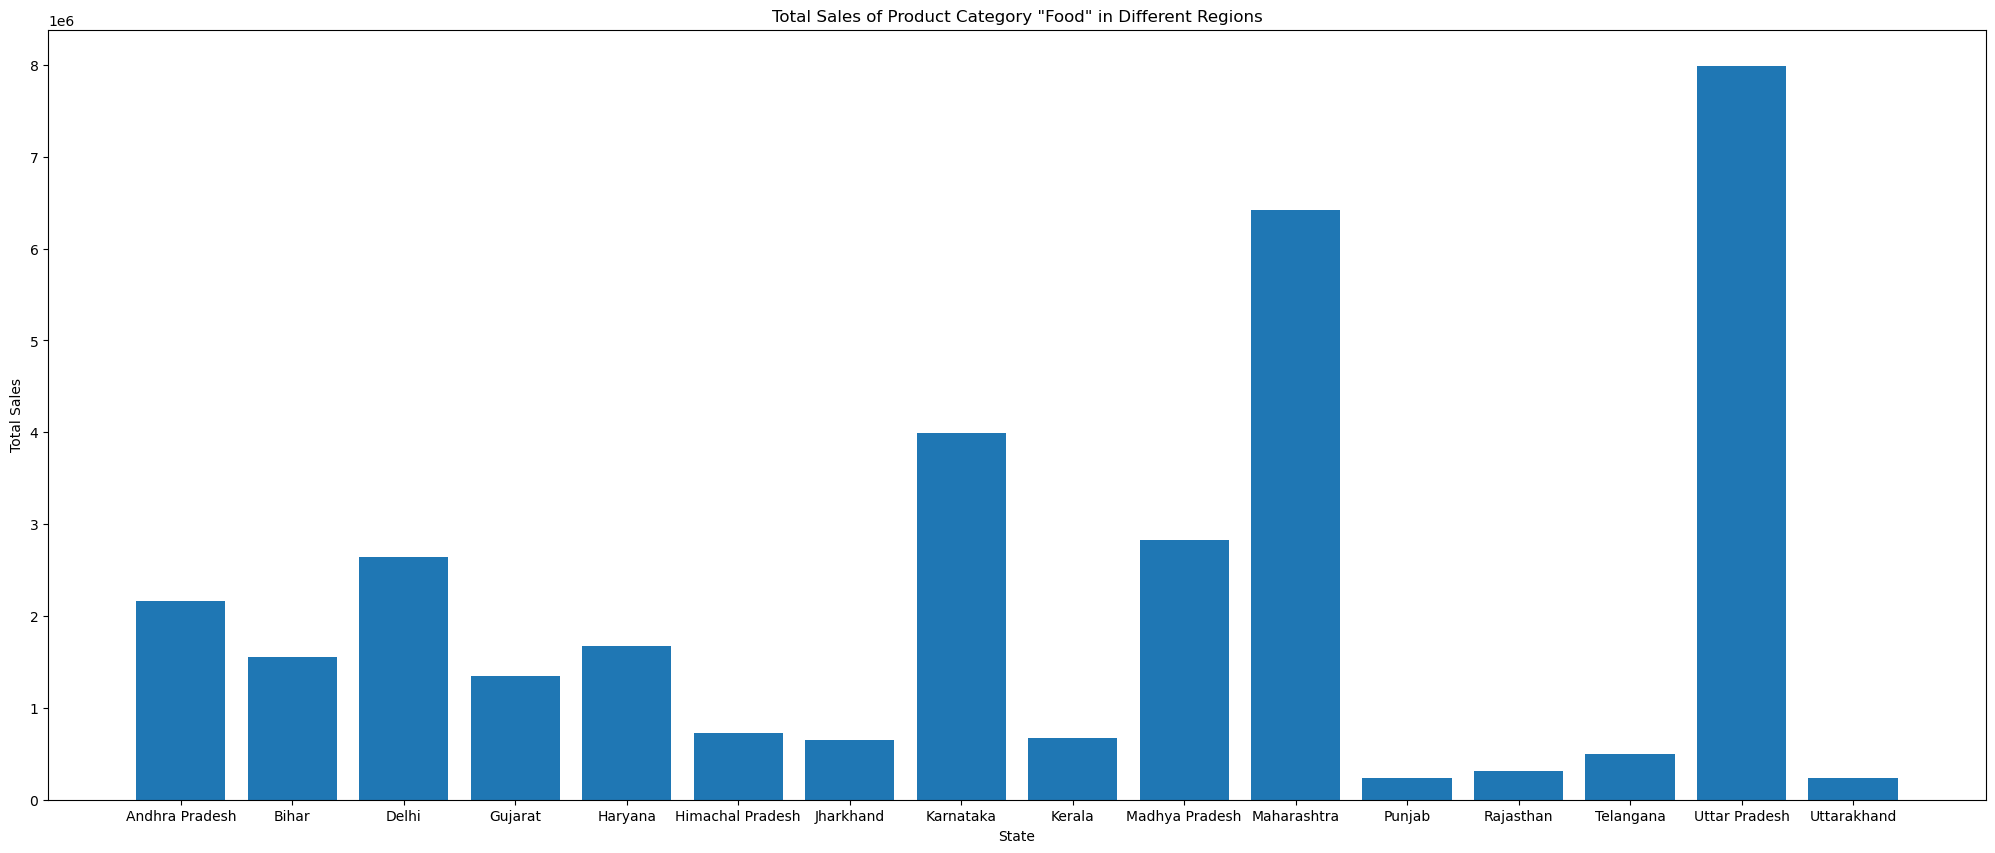

In [35]:
specific_category = 'Food'

# Filter the DataFrame based on the specific product category
filtered_df = df[df['Product_Category'] == specific_category]

# Group by Region and calculate total sales
region_total_sales = filtered_df.groupby('State')['Amount'].sum().reset_index()

# Plotting the results
plt.figure(figsize=(25,10))
plt.bar(region_total_sales['State'], region_total_sales['Amount'])
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title(f'Total Sales of Product Category "{specific_category}" in Different Regions')
plt.show()

Food is the highest selling product and total sale of food is highest in Uttar pradesh

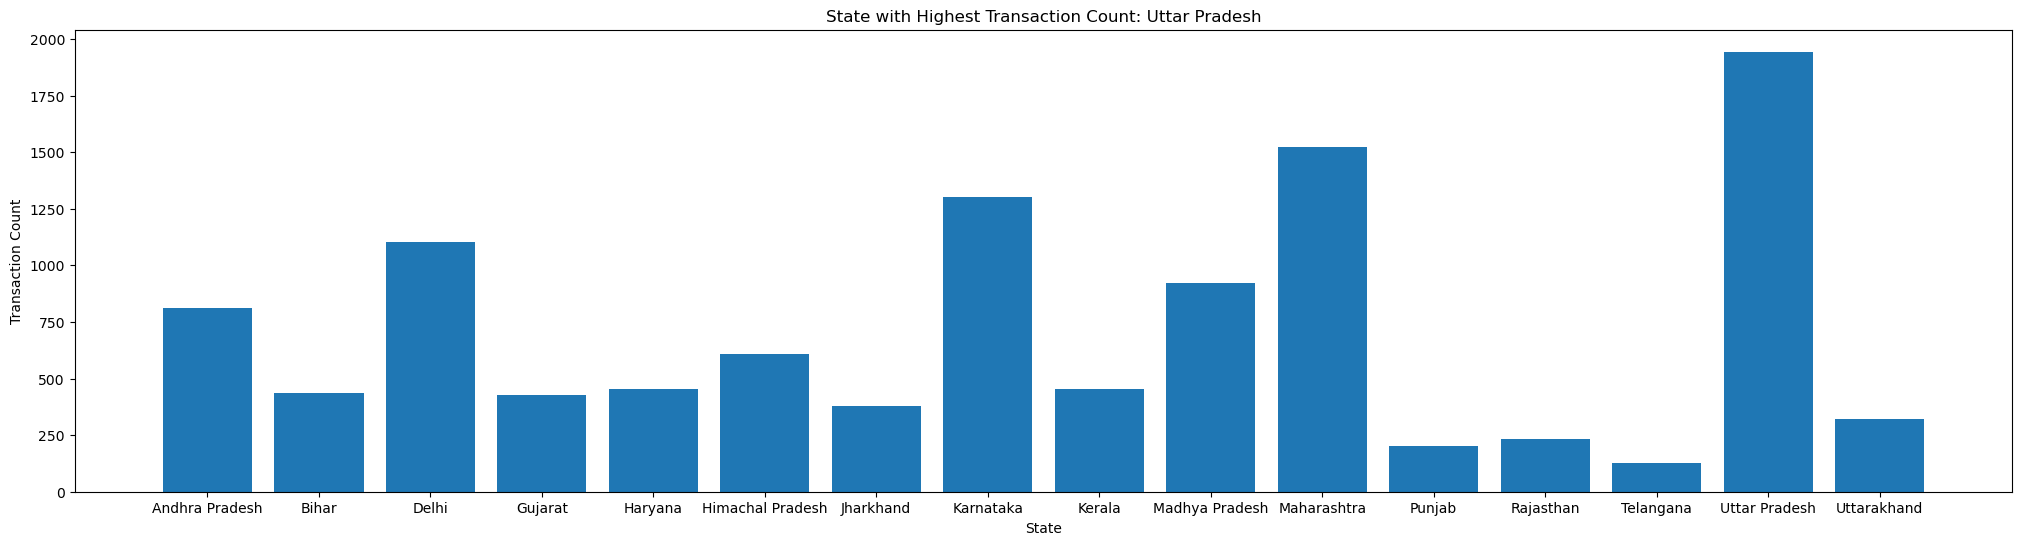

In [36]:
state_transaction_counts = df.groupby('State')['Orders'].count().reset_index()

# Find the state with the highest transaction count
max_transaction_state = state_transaction_counts.loc[state_transaction_counts['Orders'].idxmax(), 'State']

# Plotting the results
plt.figure(figsize=(25, 6))
plt.bar(state_transaction_counts['State'], state_transaction_counts['Orders'])
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.title(f'State with Highest Transaction Count: {max_transaction_state}')
plt.show()

Uttar Pradesh state is showing the highest transaction . It indicates a significant demand for products or services in Uttar Pradesh.It Reflects active engagement of consumers in buying and willingness to make purchase. It represents an opportunity for businesses to tap into the market potential in Uttar Pradesh.

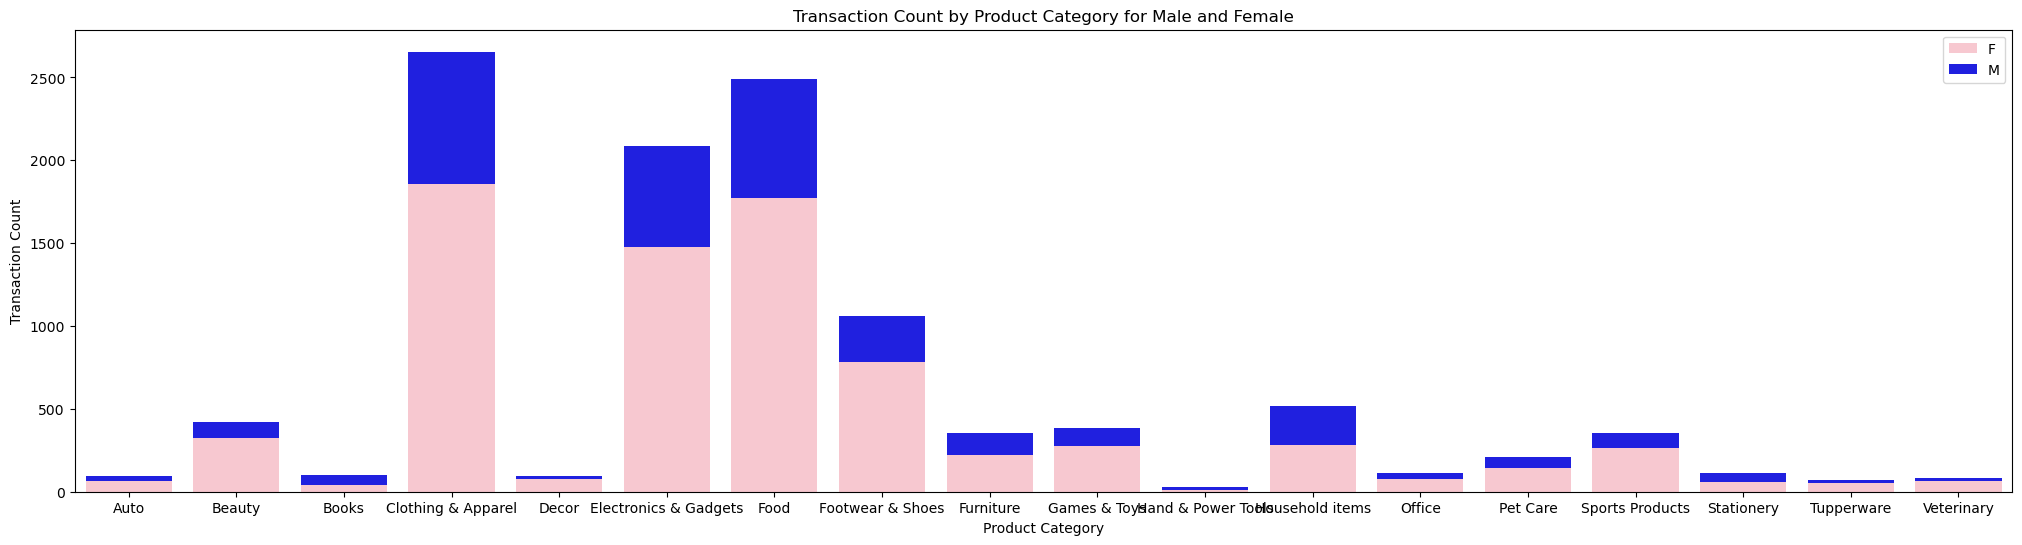

In [44]:
category_gender_counts = df.groupby(['Product_Category', 'Gender']).size().reset_index(name='Transaction Count')

# Pivot the data to have 'Product_Category' as rows, 'Gender' as columns, and 'Transaction Count' as values
pivot_table = category_gender_counts.pivot_table(index='Product_Category', columns='Gender', values='Transaction Count', fill_value=0)

# Plotting the results using a side-by-side bar plot
plt.figure(figsize=(25, 6))
sns.barplot(x=pivot_table.index, y='F', data=pivot_table, label='F', color='pink')
sns.barplot(x=pivot_table.index, y='M', data=pivot_table, label='M', color='blue', bottom=pivot_table['F'])
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Product Category for Male and Female')
plt.legend()
plt.show()

This graph is showing the purchasing ratio of male and female in every product category.

In [47]:
female_df = df[df['Gender'] == 'F']

# Group by 'Product_Category' and calculate the transaction count
female_category_counts = female_df['Product_Category'].value_counts().reset_index()

# Rename columns for clarity
female_category_counts.columns = ['Product_Category', 'Transaction Count']

# Find the most popular product category among female customers
most_popular_category_female = female_category_counts.loc[female_category_counts['Transaction Count'].idxmax(), 'Product_Category']

print(f"The most popular product category among female customers is: {most_popular_category_female}")

The most popular product category among female customers is: Clothing & Apparel


In [48]:
male_df = df[df['Gender'] == 'M']

# Group by 'Product_Category' and calculate the transaction count
male_category_counts = male_df['Product_Category'].value_counts().reset_index()

# Rename columns for clarity
male_category_counts.columns = ['Product_Category', 'Transaction Count']

# Find the most popular product category among female customers
most_popular_category_male = male_category_counts.loc[male_category_counts['Transaction Count'].idxmax(), 'Product_Category']

print(f"The most popular product category among male customers is: {most_popular_category_male}")

The most popular product category among male customers is: Clothing & Apparel


Though Food is the highest selling product category according to sales but Clothing and apparel is the most popular category between both male and female customer. Even though each clothing transaction may have a lower monetary value compared to food, there are more transactions in the clothing category.Clothing is more frequently purchased or interacted with by customers, making it the most popular category in terms of transaction frequency.

Pricing Dynamics: Food items may have a higher individual cost, contributing to higher total sales, while clothing items may be more affordable but purchased more often.

According to revenue Food is the highest selling catagory where Clothing and apperal is the popular product in case of transaction frequency.In this case improving the customer experience can be approached strategically.

Cloth:
If the sales volume for clothing is high but the revenue generated is not as high as food, it indicates that clothing items may have a lower average transaction value. To improve the sales revenue of clothing, company can implement various strategies:
1.Introduce premium or higher-priced clothing items to increase the average transaction value. This can attract customers looking for exclusive or higher-quality products.
2.Introduce limited-time promotions or discounts for specific clothing items or collections. Creating a sense of urgency can prompt customers to make quicker purchase decisions
3.Collaborate with other brands or influencers to create exclusive partnerships. Joint ventures can attract a wider audience and position the clothing brand as premium.
4.Introduce seasonal collections with limited availability. Create anticipation and demand for new and unique clothing items that are only available for a limited time. 
5.Provide an exceptional customer experience, including excellent customer service, fast shipping, and hassle-free returns. A positive overall experience can justify higher spending on clothing.

Food:
If the sales revenue for food is high, indicating a higher average transaction value, but the sales volume is lower compared to clothing, there are strategies company can implement to improve both sales revenue and popularity of food items:
1.Introduce a wider variety of food items to attract a broader customer base. Include popular and trending items to increase the appeal of the food category.
2.Create special bundles or meal deals that encourage customers to purchase multiple food items together. Bundles can provide value for money and increase the average transaction value
3.Introduce seasonal or holiday-themed food promotions. Offer special items or packages during holidays and events to capitalize on increased demand.
4.Identify the reasons of low sell in states like Rajasthan, kerala , Bihar. Collect customer feedback to understand their necessity of food items. It can increase the sell also the revenue.